### importing libraries for data exploration , preprocessing and analysis

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### reading the csv file


In [119]:
file_path = r"C:\Users\Prakriti Aayansh\OneDrive\Desktop\NeuroSafeWAPP\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

In [120]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [121]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

###  top 5 rows
 
Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

### Shape of the dataset

In [122]:
df.shape

(5110, 12)

dropping the Id column as not neeeded

In [123]:
df.drop(columns=['id'], inplace=True)


### Data Checks to perform


1. Check missing values

2. Check Duplicates

3. Check Data type

4. Check no. of unique values of each column

5. Check statistics of data set

6. Check various categories present in different categorical column


Check missing values

In [124]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI has 201 missing values. replacing it with mean BMI of dataset

In [125]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

checking missing values again

In [126]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

conclusion - missing values handled

check duplicates

In [127]:
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows in the DataFrame: {duplicate_count}")

Number of duplicate rows in the DataFrame: 0


Checking data type

In [128]:
#check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Checking number of unique values

In [129]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

Adding age group column to have age categories

In [130]:
df["age_group"]=df["age"].apply(lambda x:"Infant" if (x>=0)&(x<=2)
                                  else ("Child" if (x>2)&(x<=12)
                                  else ("Adolescent"if (x>12)&(x<=18)  
                                  else ("Young Adults"if (x>19)&(x<=35)  
                                  else ("Middle Aged Adults" if (x>35)&(x<=60) 
                                  else "Old Aged Adults")))))

Check statistics of data set and also check for outliers

In [131]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Overview:**
1. Low prevalence of hypertension (10%) and heart disease (5%) suggests these conditions are not common in the dataset.

2. Wide variability in average glucose levels and BMI indicates diverse metabolic and weight profiles among individuals.

3. Stroke Prevalence Insight:
Dataset shows a low stroke prevalence (5%), highlighting the need for addressing class imbalance in predictive modeling.

removing outliers

In [132]:
df = df[(df["bmi"]<66) & (df["bmi"]>12)]

In [133]:
df = df[(df["avg_glucose_level"]>56) & (df["avg_glucose_level"]<250)]

In [134]:
df=df.drop(df[df["gender"]=="Other"].index)

In [135]:
df.shape

(5043, 12)

## Exploratory Data Analysis


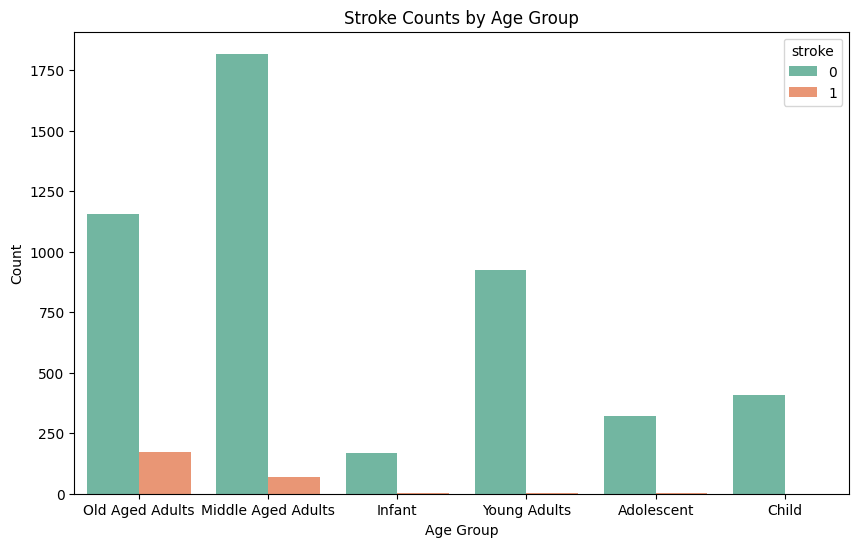

In [136]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='stroke', palette='Set2')

# Add labels and title
plt.title('Stroke Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

### Conclusion- it usually affects the middle aged and old aged adults

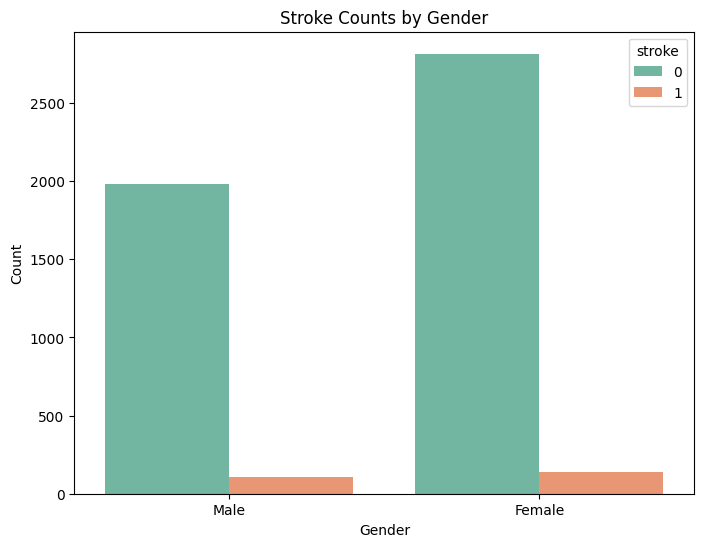

In [137]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### conclusion - gender has no relation 

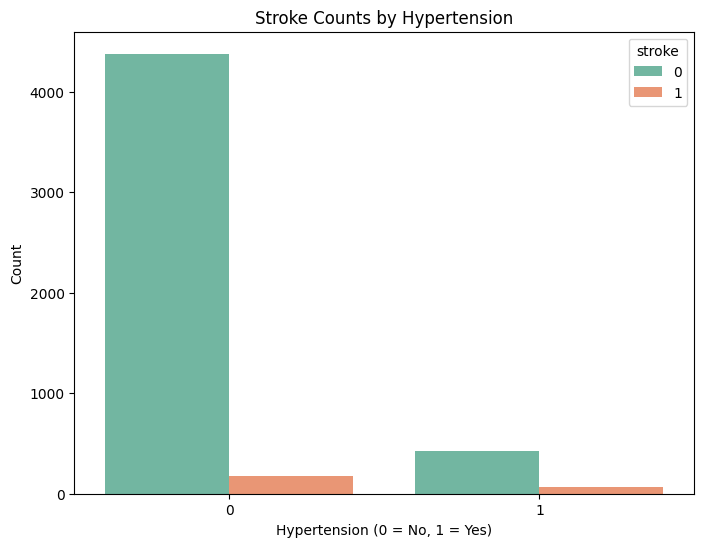

In [138]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hypertension', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



### It does affect but not too much. People who have hypertension have more stroke chances

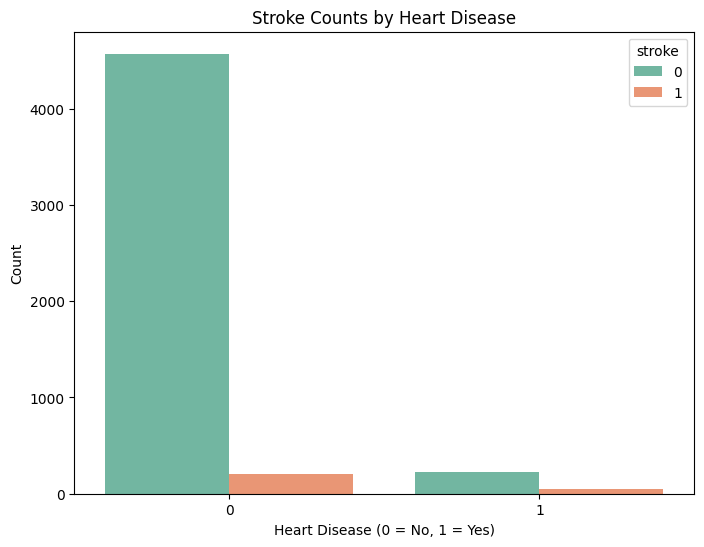

In [139]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='heart_disease', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### having heart disease does increases the stroke risk

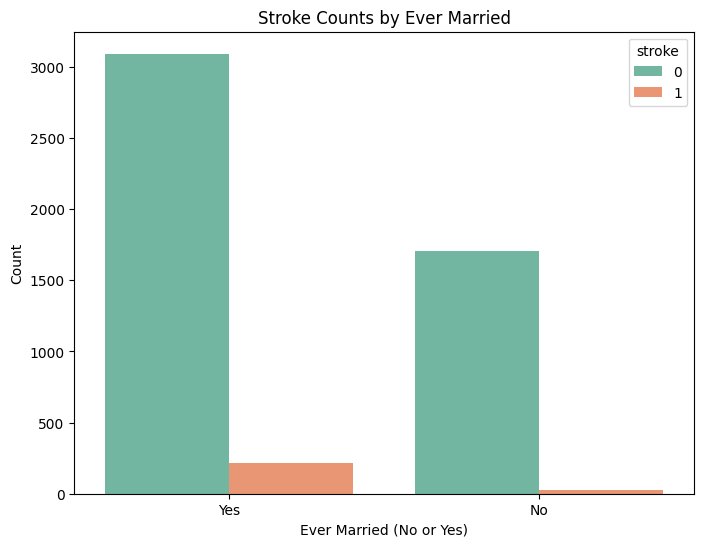

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ever_married', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Ever Married')
plt.xlabel('Ever Married (No or Yes)')
plt.ylabel('Count')
plt.show()


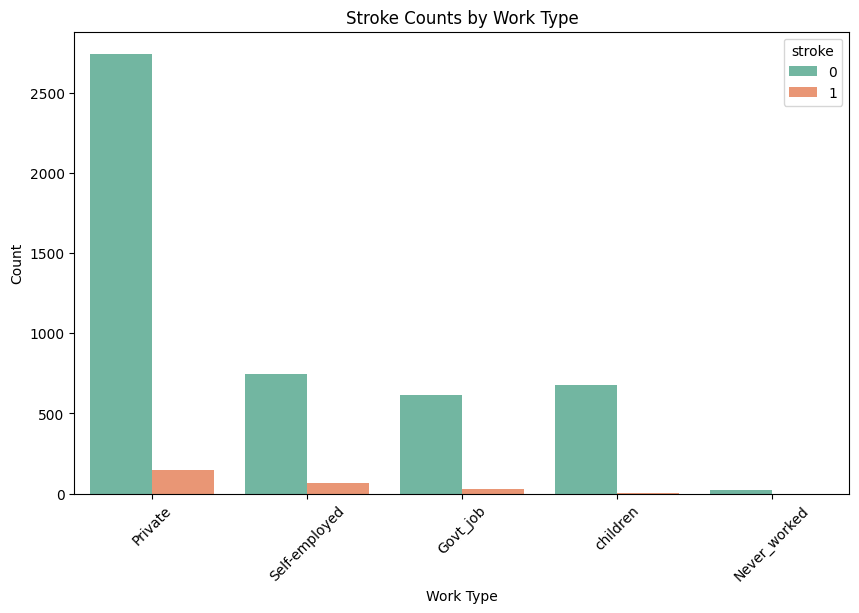

In [141]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### conclusion - work type affects stroke risk

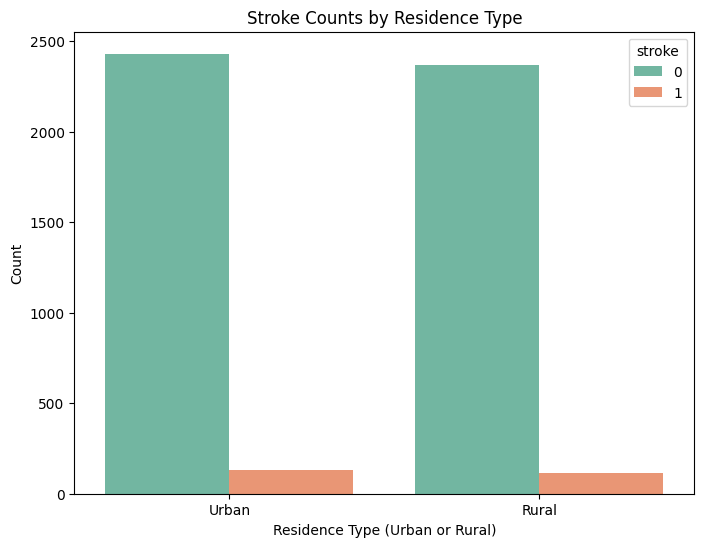

In [142]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Residence_type', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Residence Type')
plt.xlabel('Residence Type (Urban or Rural)')
plt.ylabel('Count')
plt.show()


### Conclusion - Residency type doesn't really matter

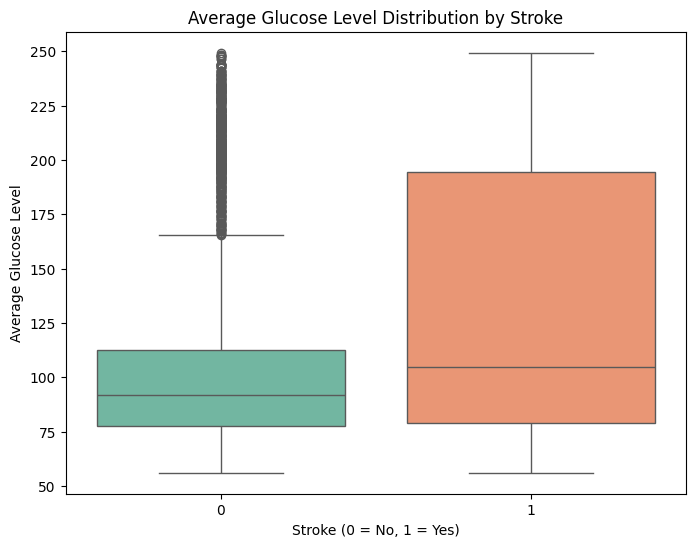

In [143]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')
plt.show()



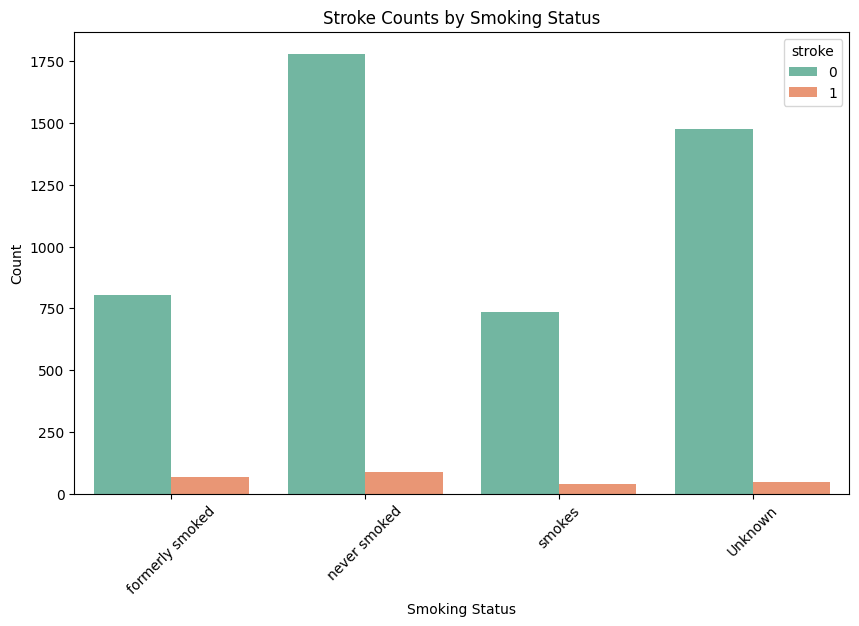

In [144]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette='Set2')
plt.title('Stroke Counts by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


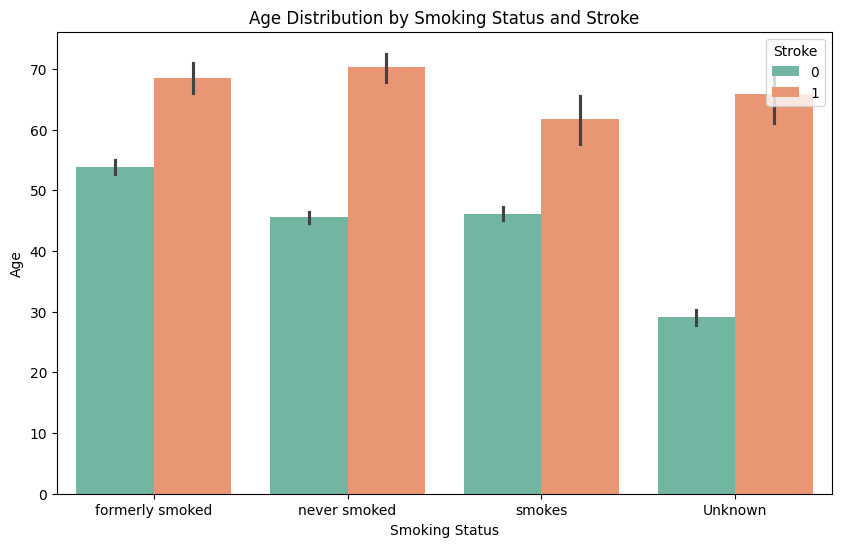

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="smoking_status", y="age", hue="stroke", palette=sns.color_palette("Set2"))
plt.title('Age Distribution by Smoking Status and Stroke')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.legend(title='Stroke', loc='upper right')
plt.show()

### Conclusion - it was a bit confusing why never smoked have higher stroke levels but when attributed with age it shows that it was due to age and not because of smoking

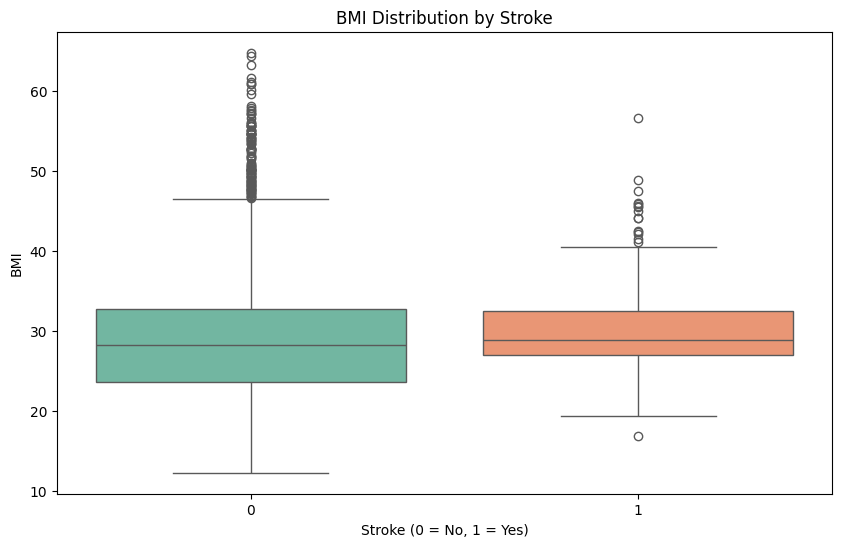

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


### Conclusion - mostly same doesn't affect much

# Preparing Data for Model Implementation

In [147]:
from sklearn.model_selection import train_test_split ,  StratifiedKFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### encoding categorical values using label encoding as we can give values like 0 1 2 for parameters like age_group etc. as the data is mostly catagorical


In [148]:
encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

### normalising numerical features to 0 and 1

In [149]:
scaler = MinMaxScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### splitting the dataset

### features = X , target = Y

In [150]:
X = df.drop(columns='stroke')
y = df['stroke']



### test size 20 percent

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)

## implementing Decision Trees

In [152]:
from sklearn.tree import DecisionTreeClassifier



### training the model

In [153]:
dt_model = DecisionTreeClassifier(random_state=7)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=7)

### Accuracy for training dataset

In [154]:

train_accuracy_dt = dt_model.score(X_train, y_train)
print(f"Training accuracy of Decision Tree: {train_accuracy_dt}")

Training accuracy of Decision Tree: 1.0


### Accuracy for testing dataset

In [155]:
test_accuracy_dt = dt_model.score(X_test, y_test)
print(f"Testing accuracy of Decision Tree: {test_accuracy_dt}")

Testing accuracy of Decision Tree: 0.8939544103072349


## Implementing Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix , f1_score
from sklearn.model_selection import cross_val_score





### Training the model

In [157]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=7, class_weight='balanced')




In [158]:
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)


print("Cross-validation Scores (Random Forest):", cv_scores_rf)


print("Average Cross-validation Accuracy (Random Forest):", cv_scores_rf.mean())

Cross-validation Scores (Random Forest): [0.95143707 0.95044599 0.94945491 0.95039683 0.95039683]
Average Cross-validation Accuracy (Random Forest): 0.9504263218336557


In [159]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=7)

### testing 


In [160]:

y_pred_rf = rf_model.predict(X_test)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy on Test Set (Random Forest):", test_accuracy_rf)


Accuracy on Test Set (Random Forest): 0.9554013875123885


### evaluation performance with classification report and confusion matrix

In [161]:
print("Random Forest Classifier Metrics:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       963
           1       1.00      0.02      0.04        46

    accuracy                           0.96      1009
   macro avg       0.98      0.51      0.51      1009
weighted avg       0.96      0.96      0.93      1009



### Conclusion

1. **High Overall Accuracy**:
   - The model achieves a high accuracy of **96%** on the test set

2. **Imbalanced Precision and Recall**:
   - For the **majority class (0)**:
     - **Precision**: 0.96 identifies 96% of the actual non-stroke cases as non-stroke.
     - **Recall**: 1.00 The model captures 100% of the actual non-stroke cases.
     - **F1-Score**: 0.98 Harmonic mean of precision and recall, indicating excellent performance.
   - For the **minority class (1)**:
     - **Precision**: 1.00 identifies stroke cases perfectly when it predicts stroke, but :(
     - **Recall**: 0.02 l captures only 2% of the actual stroke cases, missing most of them.
     - **F1-Score**: 0.04 Very low, poor performance in identifying stroke cases.

3. **Imbalance in Class Distribution**:
   - The support values (963 non-stroke cases vs. 46 stroke cases) highlight a significant class imbalance, where non-stroke cases dominate the dataset.



### Implications

- **High Accuracy with Class Imbalance**: The model's high accuracy is driven largely by  performance on the majority class (non-stroke cases). The poor recall for the minority class (stroke cases) indicating that the model struggles to identify actual stroke cases.

- **Model Limitations**: low recall for the minority class, the model may not be reliable for predicting stroke cases 



In [162]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[963   0]
 [ 45   1]]


TN - 963 , FN - 45
TP - 1 , TN - O

**from classification matrix and confusion matrix it's confirmed that model performs well for non stroke cases but not for actual stroke cases due to imbalance in dataset**


### plotted the learning curve for better understanding

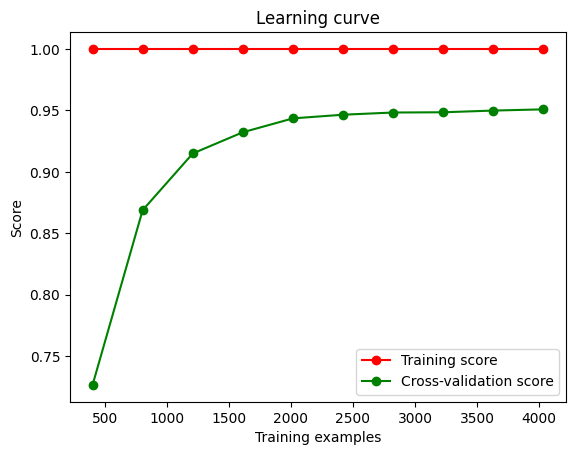

In [163]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()

### doing oversampling of the minority class to handle the imbalance and the bias predictions suggested

In [164]:
from imblearn.over_sampling import SMOTE

In [165]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [166]:

print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {}".format(sum(y_train == 0)))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_resampled == 0)))

Before SMOTE, counts of label '1': 198
Before SMOTE, counts of label '0': 3836
After SMOTE, counts of label '1': 3836
After SMOTE, counts of label '0': 3836


#### oversampling done , implementing random forest on the resampled training data.

In [167]:

# Initialize RandomForestClassifier with balanced class weights
rf_model_resample = RandomForestClassifier(class_weight='balanced', random_state=7)



In [168]:
# Perform cross-validation on the resampled training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model_resample, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.93159609 0.93094463 0.93676662 0.93220339 0.92372881]
Mean CV Accuracy: 0.9310479086419019


In [169]:
rf_model_resample.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=7)

In [170]:
y_pred = rf_model_resample.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set (Random Forest):", test_accuracy_rf)

Accuracy on Test Set (Random Forest): 0.8771060455896927


In [171]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       963
           1       0.13      0.30      0.18        46

    accuracy                           0.88      1009
   macro avg       0.55      0.60      0.56      1009
weighted avg       0.93      0.88      0.90      1009



In [172]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[871  92]
 [ 32  14]]


The model correctly identifies most non-stroke cases but struggles with stroke case still it is significant improvement after over-sampling

### Implementing XGBoost

In [173]:
from xgboost import XGBClassifier

initializing

In [174]:

xgb_model = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=7)

In [175]:
# Perform cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validation Scores (XGBoost):", cv_scores_xgb)
print("Average Cross-validation Accuracy (XGBoost):", np.mean(cv_scores_xgb))

Cross-validation Scores (XGBoost): [0.89641694 0.9485342  0.93546284 0.93872229 0.93415906]
Average Cross-validation Accuracy (XGBoost): 0.9306590676479706


fitting

In [176]:

xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

##### repeating steps from the above model implementation to check progress

In [177]:

y_pred_xgb = xgb_model.predict(X_test)

In [178]:

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy on Test Set (XGBoost):", accuracy_xgb)

Accuracy on Test Set (XGBoost): 0.88800792864222


In [179]:

print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       963
           1       0.12      0.24      0.16        46

    accuracy                           0.89      1009
   macro avg       0.54      0.58      0.55      1009
weighted avg       0.92      0.89      0.90      1009

Confusion Matrix (XGBoost):
[[885  78]
 [ 35  11]]


##### Overall decrease in accuracy but has better prediction results for the minority class so it's a good progress

##### Implementing hyperparameter tuning using randomsearch

In [180]:
from sklearn.model_selection import RandomizedSearchCV 


In [181]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [182]:
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],                # Try different learning rates
    'max_depth': np.arange(3, 10),                               # Maximum depth of the trees
    'min_child_weight': np.arange(1, 11),                         # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],                             # Minimum loss reduction required to make a further partition
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],                       # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],                # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5, 1.0],                              # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1.0]                              # L2 regularization term on weights
}


In [183]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, scoring='f1', cv=5, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=1)

In [184]:
print("Best parameters found: ", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Best parameters found:  {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'min_child_weight': np.int64(3), 'max_depth': np.int64(5), 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.9}

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       947
           1       0.31      0.06      0.11        62

    accuracy                           0.93      1009
   macro avg       0.62      0.53      0.54      1009
weighted avg       0.90      0.93      0.91      1009


Accuracy Score: 0.933597621407334
F1 Score: 0.10666666666666667


 according to my requirements - (to have an overall good prediction  along with handling minority classes) random forest with SMOTE is a better choice to deploy

In [185]:
import pickle

In [186]:
import pickle
import os

# Define the model path
model_path = r"C:\Users\Prakriti Aayansh\OneDrive\Desktop\NeuroSafeWAPP\rf_model_resample.pkl"

# Save the model to the specified path
with open(model_path, 'wb') as file:
    pickle.dump(rf_model_resample, file)

print(f"Model saved to {model_path}")
